Creator: e. tsykunov

1st edit: a. fedoseev

In [1]:
import pyrealsense2 as rs
import open3d as o3d
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy.spatial.transform import Rotation as R
import copy

In [2]:
np.set_printoptions(precision=4, suppress=True)

# Saving all frames 

In [3]:
# data filenames
d435_filename = 'data/D435.bag'
t265_filename = 'data/T265.bag'

### T265

In [4]:
# Setup:
cfg = rs.config()
cfg.enable_device_from_file(t265_filename)
cfg.enable_stream(rs.stream.pose)
pipe = rs.pipeline()
profile = pipe.start(cfg)

t265_data_list = []
t265_time_list = []
first_timestamp = None
while(True):

    frames = pipe.wait_for_frames()
    pose = frames.get_pose_frame()
    
    if pose:
        if pose.get_timestamp() == first_timestamp:
            print('reached the first frame - reading bag file completed')
            break
        if first_timestamp is None:
            first_timestamp = pose.get_timestamp()
            print('first_timestamp',first_timestamp)
        print('current-first',pose.get_timestamp()-first_timestamp)
        t265_data_list.append(pose.get_pose_data())
        t265_time_list.append(pose.get_timestamp())

pipe.stop()

first_timestamp 1585059273040.0645
current-first 0.0
current-first 4.9990234375
current-first 9.998046875
current-first 14.9970703125
current-first 19.9970703125
current-first 24.99609375
current-first 29.9951171875
current-first 34.993896484375
current-first 39.9931640625
current-first 44.9931640625
current-first 49.991943359375
current-first 54.9912109375
current-first 59.989990234375
current-first 64.989013671875
current-first 69.9892578125
current-first 74.988037109375
current-first 79.987060546875
current-first 84.986083984375
current-first 89.985107421875
current-first 94.98388671875
current-first 99.983154296875
current-first 104.983154296875
current-first 109.98193359375
current-first 114.981201171875
current-first 119.97998046875
current-first 124.97998046875
current-first 129.97900390625
current-first 134.97802734375
current-first 139.97705078125
current-first 144.975830078125
current-first 149.97509765625
current-first 154.97509765625
current-first 159.973876953125
current-f

In [5]:
len(t265_time_list)

6147

### D435i

In [6]:
# Setup:
cfg = rs.config()
cfg.enable_device_from_file(d435_filename)
cfg.enable_stream(rs.stream.depth, 848, 480, rs.format.z16, 30)
pipe = rs.pipeline()
profile = pipe.start(cfg)

d435_data_list = []
d435_time_list = []
# a = np.array([])
# l = []
first_timestamp = None
counter = 0
while(True):

    frames = pipe.wait_for_frames()
    depth_frame = frames.get_depth_frame()
#     print('\ndepth_frame.get_timestamp()',depth_frame.get_timestamp())
    
    if depth_frame.get_timestamp() == first_timestamp:
        print('reached the first frame - reading bag file completed')
        print('timestamp',depth_frame.get_timestamp())
        break
    if first_timestamp is None:
        first_timestamp = depth_frame.get_timestamp()
        print('first_timestamp',first_timestamp)
    print('current-first',depth_frame.get_timestamp()-first_timestamp)
    
    
    
    # to do it first go and find timestampsmof key frames
        depth_frame1 = depth_frame
    if depth_frame.get_timestamp() == 1585059293549.9937:
        depth_frame2 = depth_frame
    
    
#     depth_image = np.asanyarray(depth_frame.get_data())
#     depth_image = cv2.convertScaleAbs(depth_image, alpha=0.03)
#     cv2.imshow('D435 Depth Frame', depth_image)
#     cv2.waitKey(1)
    
#     counter+=1
#     if counter%30==0:
#         a = np.hstack((a, depth_frame))
#         l.append(depth_frame)
    
    d435_data_list.append(np.asanyarray(depth_frame.get_data()).copy())
    d435_time_list.append(depth_frame.get_timestamp())

cv2.destroyAllWindows()
pipe.stop()

first_timestamp 1585059272738.613
current-first 0.0
current-first 32.364013671875
current-first 65.6904296875
current-first 98.64453125
current-first 131.9052734375
current-first 165.260009765625
current-first 198.619384765625
current-first 231.972412109375
current-first 265.320556640625
current-first 298.669921875
current-first 332.087646484375
current-first 365.589111328125
current-first 398.846923828125
current-first 432.1474609375
current-first 465.772216796875
current-first 498.96435546875
current-first 532.234375
current-first 565.82763671875
current-first 598.99462890625
current-first 632.35302734375
current-first 665.62646484375
current-first 698.97509765625
current-first 732.40380859375
current-first 765.72802734375
current-first 799.047119140625
current-first 832.42724609375
current-first 865.82275390625
current-first 899.141357421875
current-first 932.950927734375
current-first 966.539306640625
current-first 999.246826171875
current-first 1032.65673828125
current-first 1065.

# TODO: submit an issue about saving limit of pyrealsense2.pyrealsense2.depth_frame objects

# Define key frames

In [7]:
number_of_keyframes = 2

### 265 frames

In [8]:
idx1 = int(len(t265_data_list)*0.65)
idx2 = idx1 + 100 # plus 1 sec
#frame 1
t265_frame1_data = t265_data_list[idx1]
t265_frame1_time = t265_time_list[idx1]
#frame 2
t265_frame2_data = t265_data_list[idx2]
t265_frame2_time = t265_time_list[idx2]

### 435 frames

In [9]:
idx1, val1 = min(enumerate(d435_time_list), key=lambda x: abs(x[1]-t265_frame1_time))
t265_frame1_time, idx1, val1

(1585059293012.0835, 608, 1585059293016.778)

In [10]:
idx2, val2 = min(enumerate(d435_time_list), key=lambda x: abs(x[1]-t265_frame2_time))
t265_frame2_time, idx2, val2

(1585059293512.0708, 623, 1585059293516.6475)

In [11]:
#frame 1
d435_frame1_data = d435_data_list[idx1]#depth_frame1
d435_frame1_time = d435_time_list[idx1]
#frame 2
d435_frame2_data = d435_data_list[idx2]# depth_frame2
d435_frame2_time = d435_time_list[idx2]
d435_frame1_time, d435_frame2_time

(1585059293016.778, 1585059293516.6475)

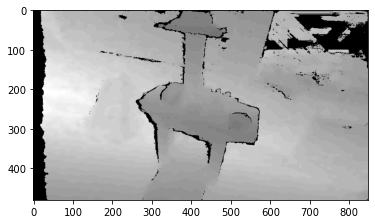

In [12]:
#frame 1
# depth_image = cv2.convertScaleAbs(d435_frame1_data, alpha=0.03)
depth_image = np.asanyarray(depth_frame1.get_data())
depth_image = cv2.convertScaleAbs(depth_image, alpha=0.03)
plt.imshow(depth_image, cmap='gray')

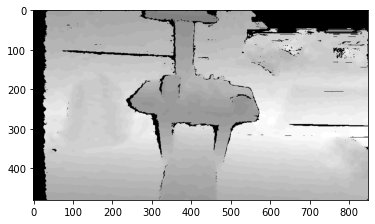

In [13]:
#frame 2
# depth_image = cv2.convertScaleAbs(d435_frame2_data, alpha=0.03)
depth_image = np.asanyarray(depth_frame2.get_data())
depth_image = cv2.convertScaleAbs(depth_image, alpha=0.03)
plt.imshow(depth_image, cmap='gray')

# Transformations

transformation between cameras

$ {}^{T}T_D$ - d435 wrt t265, always the same

In [14]:
T_d_wrt_t = np.array([[0.999968402, -0.006753626, -0.004188075, -0.015890727],
                      [-0.006685408, -0.999848172, 0.016093893, 0.028273059],
                      [-0.004296131, -0.016065384, -0.999861654, -0.009375589],
                      [0, 0, 0, 1]])

In [15]:
def get_transformation(data):
#     data = pose.get_pose_data()
    data_rot = [float(i.strip('xyzw: ')) for i in str(data.rotation).split(', ')]
    r = R.from_quat(data_rot)
    rotation = np.array(r.as_matrix())
    translation = np.array([float(i.strip('xyzw: ')) for i in str(data.translation).split(', ')])[np.newaxis].T
    T = np.hstack((rotation, translation))
    T = np.vstack((T, np.array([0, 0, 0, 1])))
    return T

transformation of t265 wrt world

$ {}^{W}T_{T}$

In [16]:
#frame1
T_t1_wrt_w = get_transformation(t265_frame1_data)
T_t1_wrt_w

array([[ 0.9548, -0.2333,  0.1841, -2.6495],
       [ 0.1027,  0.8404,  0.5322,  0.3922],
       [-0.2789, -0.4892,  0.8264, -0.962 ],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])

In [17]:
#frame2
T_t2_wrt_w = get_transformation(t265_frame2_data)
T_t2_wrt_w

array([[ 0.9968, -0.0698, -0.0381, -2.8258],
       [ 0.0789,  0.8073,  0.5848,  0.3956],
       [-0.0101, -0.586 ,  0.8103, -0.9334],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])

transformation of d435 wrt world

$ {}^{W}T_{D1} = {}^{W}T_{T} {}^{T}T_{D1}$

In [18]:
#frame1
T_d1_wrt_w = T_t1_wrt_w @ T_d_wrt_t
T_d1_wrt_w

array([[ 0.9556,  0.2239, -0.1918, -2.673 ],
       [ 0.0948, -0.8495, -0.519 ,  0.4094],
       [-0.2791,  0.4777, -0.833 , -0.9791],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])

$ {}^{W}T_{D2} = {}^{W}T_{T} {}^{T}T_{D2}$

In [19]:
#frame2
T_d2_wrt_w = T_t2_wrt_w @ T_d_wrt_t
T_d2_wrt_w

array([[ 0.9974,  0.0637,  0.0328, -2.8432],
       [ 0.071 , -0.8171, -0.5721,  0.4116],
       [-0.0097,  0.5729, -0.8196, -0.9575],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])

transformation of keyframe2 wrt keyframe1

$ {}^{W}T_{D2} = {}^{W}T_{D1} {}^{D1}T_{D2}$

$ ({}^{W}T_{D1})^{-1} {}^{W}T_{D2} = {}^{D1}T_{D2}$

${}^{D1}T_{D2}$:

In [20]:
# keyframe 2 wtr keyframe 1
T_d2_wrt_d1 = np.linalg.inv(T_d1_wrt_w) @ T_d2_wrt_w
T_d2_wrt_d1

array([[ 0.9625, -0.1766,  0.2058, -0.1685],
       [ 0.1584,  0.9821,  0.1018, -0.0297],
       [-0.2201, -0.0653,  0.9733,  0.0134],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])

Now let's try to get ${}^{D1}T_{D2}$ from point cloud registration

# Point cloud registration

### Defive PC, init, and max_point_pair_dist

In [21]:
def get_geom_pcl(depth_frame): #slower
    pc = rs.pointcloud()
    points = pc.calculate(depth_frame).as_points()
    coordinates = np.ndarray(buffer=points.get_vertices(), dtype=np.float32, shape=(480, 848, 3)) \
        .reshape((-1, 3))
    coordinates = coordinates[coordinates[:, 2] != 0]
    pcl = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(coordinates))
    return pcl

In [22]:
import copy
def draw_registration_result(source, target, transformation):
    source_temp = copy.deepcopy(source)
    target_temp = copy.deepcopy(target)
    source_temp.paint_uniform_color([1, 0.706, 0])
    target_temp.paint_uniform_color([0, 0.651, 0.929])
    source_temp.transform(transformation)
    o3d.visualization.draw_geometries([source_temp, target_temp])

In [23]:
%%time
pcl1 = get_geom_pcl(depth_frame1)
pcl2 = get_geom_pcl(depth_frame2)

Wall time: 1.2 s


In [24]:
init = T_d2_wrt_d1 # does not help much ?

In [25]:
max_point_pair_dist = 0.05

### Evaliate init guess

In [26]:
evaluation_init = o3d.registration.evaluate_registration(pcl2, pcl1,
                                                    max_point_pair_dist, init)
evaluation_init

registration::RegistrationResult with fitness=8.500270e-01, inlier_rmse=1.169206e-02, and correspondence_set size of 311744
Access transformation to get result.

In [27]:
draw_registration_result(pcl2, pcl1, init)

### Evaluate PtP vs PtPL ICP, no downsampling

#### With $init = Identity$

In [28]:
%%time
T = o3d.registration.registration_icp(pcl2, pcl1, max_point_pair_dist)
T, T.transformation

Wall time: 16.1 s


(registration::RegistrationResult with fitness=8.315128e-01, inlier_rmse=1.815872e-02, and correspondence_set size of 304954
 Access transformation to get result.,
 array([[ 0.9752, -0.1317,  0.1778, -0.1548],
        [ 0.1266,  0.9912,  0.0397,  0.0025],
        [-0.1815, -0.0162,  0.9833,  0.0231],
        [ 0.    ,  0.    ,  0.    ,  1.    ]]))

In [29]:
draw_registration_result(pcl2, pcl1, T.transformation)

#### With $init = {}^{D1}T_{D2}$

In [30]:
%%time
T_init = o3d.registration.registration_icp(pcl2, pcl1, max_point_pair_dist, init)
T_init, T_init.transformation

Wall time: 7.73 s


(registration::RegistrationResult with fitness=8.595568e-01, inlier_rmse=1.126183e-02, and correspondence_set size of 315239
 Access transformation to get result.,
 array([[ 0.9632, -0.1794,  0.2002, -0.1783],
        [ 0.1638,  0.9822,  0.0922, -0.0198],
        [-0.2132, -0.056 ,  0.9754,  0.0125],
        [ 0.    ,  0.    ,  0.    ,  1.    ]]))

In [152]:
draw_registration_result(pcl2, pcl1, T_init.transformation)

In [35]:
pcl3 = copy.deepcopy(pcl1)
pcl4 = copy.deepcopy(pcl2)

In [37]:
%%time

pcl3.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
pcl4.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

T_plane = o3d.registration.registration_icp(pcl4, pcl3, max_point_pair_dist, np.eye(4),\
                                          o3d.registration.TransformationEstimationPointToPlane())
T_plane, T_plane.transformation

Wall time: 8.82 s


(registration::RegistrationResult with fitness=8.539561e-01, inlier_rmse=1.085674e-02, and correspondence_set size of 313185
 Access transformation to get result.,
 array([[ 0.9628, -0.1804,  0.2011, -0.1737],
        [ 0.1636,  0.9817,  0.0977, -0.0217],
        [-0.2151, -0.0612,  0.9747,  0.0109],
        [ 0.    ,  0.    ,  0.    ,  1.    ]]))

In [41]:
%%time
pcl3.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
pcl4.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
T_plane_init = o3d.registration.registration_icp(pcl4, pcl3, max_point_pair_dist, init,\
                                          o3d.registration.TransformationEstimationPointToPlane())
T_plane_init,T_plane_init.transformation

Wall time: 3.41 s


(registration::RegistrationResult with fitness=8.539452e-01, inlier_rmse=1.085616e-02, and correspondence_set size of 313181
 Access transformation to get result.,
 array([[ 0.9628, -0.1804,  0.2011, -0.1737],
        [ 0.1636,  0.9817,  0.0977, -0.0217],
        [-0.2151, -0.0612,  0.9747,  0.0109],
        [ 0.    ,  0.    ,  0.    ,  1.    ]]))

In [153]:
draw_registration_result(pcl4, pcl3, T_plane_init.transformation)

# Results

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


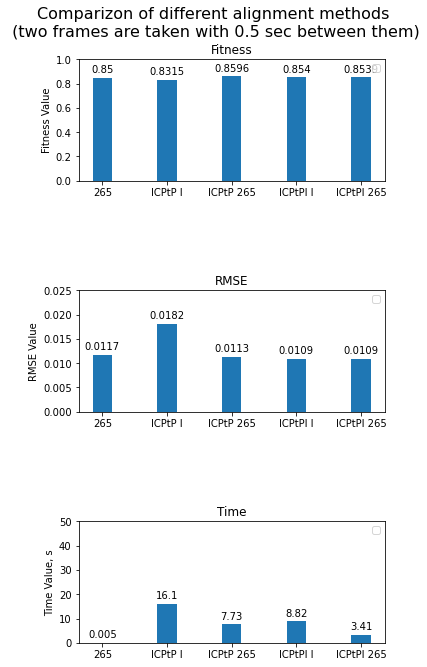

In [151]:
fitness_list =  [evaluation_init.fitness, T.fitness, T_init.fitness, T_plane.fitness, T_plane_init.fitness ]
rmse_list =  [evaluation_init.inlier_rmse, T.inlier_rmse, T_init.inlier_rmse, T_plane.inlier_rmse, T_plane_init.inlier_rmse]
time_list =  [0.005, 16.1, 7.73,8.82,3.41 ]
labels =  [ '265', 'ICPtP I', 'ICPtP 265',\
           'ICPtPl I','ICPtPl 265']
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, (ax0, ax, ax2) = plt.subplots(3,1)

fig.suptitle('Comparizon of different alignment methods\n (two frames are taken with 0.5 sec between them)\n ', fontsize=16)
rects0 = ax0.bar(x, fitness_list, width)
rects1 = ax.bar(x, rmse_list, width)
rects2 = ax2.bar(x, time_list, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax0.set_ylabel('Fitness Value')
ax0.set_title('Fitness')
ax0.set_xticks(x)
ax0.set_xticklabels(labels)
ax0.legend()
ax0.set_ylim([0,1])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSE Value')
ax.set_title('RMSE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim([0,0.025])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Time Value, s')
ax2.set_title('Time')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()
ax2.set_ylim([0,50])

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),4)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects0, ax0)
autolabel(rects1, ax)
autolabel(rects2, ax2)

fig.tight_layout()
fig.set_size_inches(5, 10)

plt.show()

## With downsampling

In [296]:
_pcl1 = convert_to_pcl(get_coordinates(depth_frame1, koef = 2**3))
_pcl2 = convert_to_pcl(get_coordinates(depth_frame2, koef = 2**3))

In [297]:
evaluation_init = o3d.registration.evaluate_registration(_pcl2, _pcl1,
                                                    max_point_pair_dist, init)
evaluation_init

registration::RegistrationResult with fitness=8.389419e-01, inlier_rmse=1.630682e-02, and correspondence_set size of 5011
Access transformation to get result.

In [139]:
decimate = rs.decimation_filter()
decimate.set_option(rs.option.filter_magnitude, 2**3)
df_1 = decimate.process(depth_frame1)
df_2 = decimate.process(depth_frame2)

In [140]:
df_1 = decimate.process(df_1)
df_2 = decimate.process(df_2)

In [ ]:
%%time
_pcl1 = get_geom_pcl(df_1)
_pcl2 = get_geom_pcl(df_2)

In [298]:
draw_registration_result(_pcl2, _pcl1, init)

In [299]:
%%time
_T = o3d.registration.registration_icp(_pcl2, _pcl1, max_point_pair_dist)
_T, _T.transformation

Wall time: 87.7 ms


(registration::RegistrationResult with fitness=8.062950e-01, inlier_rmse=2.207405e-02, and correspondence_set size of 4816
 Access transformation to get result.,
 array([[ 0.9776, -0.1257,  0.1686, -0.1449],
        [ 0.1206,  0.9919,  0.0402,  0.0007],
        [-0.1723, -0.019 ,  0.9849,  0.0233],
        [ 0.    ,  0.    ,  0.    ,  1.    ]]))

In [300]:
%%time
_T_init = o3d.registration.registration_icp(_pcl2, _pcl1, max_point_pair_dist, init)
_T_init, _T_init.transformation

Wall time: 87.3 ms


(registration::RegistrationResult with fitness=8.501590e-01, inlier_rmse=1.541334e-02, and correspondence_set size of 5078
 Access transformation to get result.,
 array([[ 0.963 , -0.1816,  0.1989, -0.1787],
        [ 0.1649,  0.9815,  0.0975, -0.0225],
        [-0.213 , -0.061 ,  0.9752,  0.0097],
        [ 0.    ,  0.    ,  0.    ,  1.    ]]))

In [301]:
_pcl3 = copy.deepcopy(_pcl1)
_pcl4 = copy.deepcopy(_pcl2)

In [302]:
%%time

_pcl3.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
_pcl4.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

_T_plane = o3d.registration.registration_icp(_pcl4, _pcl3, max_point_pair_dist, np.eye(4),\
                                          o3d.registration.TransformationEstimationPointToPlane())
_T_plane, _T_plane.transformation

Wall time: 68.8 ms


(registration::RegistrationResult with fitness=8.411184e-01, inlier_rmse=1.497547e-02, and correspondence_set size of 5024
 Access transformation to get result.,
 array([[ 0.9628, -0.1812,  0.2003, -0.174 ],
        [ 0.1622,  0.9808,  0.1079, -0.0282],
        [-0.216 , -0.0715,  0.9738,  0.0078],
        [ 0.    ,  0.    ,  0.    ,  1.    ]]))

In [303]:
%%time
_pcl3.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
_pcl4.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
_T_plane_init = o3d.registration.registration_icp(_pcl4, _pcl3, max_point_pair_dist, init,\
                                          o3d.registration.TransformationEstimationPointToPlane())
_T_plane_init,_T_plane_init.transformation

Wall time: 43.9 ms


(registration::RegistrationResult with fitness=8.411184e-01, inlier_rmse=1.497547e-02, and correspondence_set size of 5024
 Access transformation to get result.,
 array([[ 0.9628, -0.1812,  0.2003, -0.174 ],
        [ 0.1622,  0.9808,  0.1079, -0.0282],
        [-0.216 , -0.0715,  0.9738,  0.0078],
        [ 0.    ,  0.    ,  0.    ,  1.    ]]))

In [304]:
draw_registration_result(_pcl4,_pcl3, _T_plane_init.transformation)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


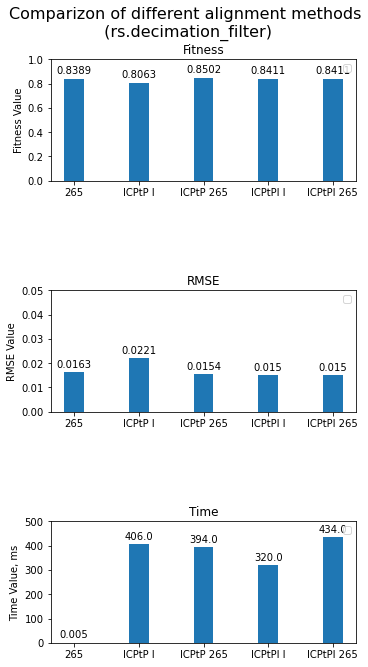

In [305]:
fitness_list =  [evaluation_init.fitness, _T.fitness, _T_init.fitness, _T_plane.fitness, _T_plane_init.fitness ]
rmse_list =  [evaluation_init.inlier_rmse, _T.inlier_rmse, _T_init.inlier_rmse, _T_plane.inlier_rmse, _T_plane_init.inlier_rmse]
time_list =  [0.005, 406, 394,320,434 ]
labels =  [ '265', 'ICPtP I', 'ICPtP 265',\
           'ICPtPl I','ICPtPl 265']
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, (ax0, ax, ax2) = plt.subplots(3,1)

fig.suptitle('Comparizon of different alignment methods\n (rs.decimation_filter)\n'\
             , fontsize=16)
rects0 = ax0.bar(x, fitness_list, width)
rects1 = ax.bar(x, rmse_list, width)
rects2 = ax2.bar(x, time_list, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax0.set_ylabel('Fitness Value')
ax0.set_title('Fitness')
ax0.set_xticks(x)
ax0.set_xticklabels(labels)
ax0.legend()
ax0.set_ylim([0,1])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSE Value')
ax.set_title('RMSE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim([0,0.05])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Time Value, ms')
ax2.set_title('Time')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()
ax2.set_ylim([0,500])

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),4)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects0, ax0)
autolabel(rects1, ax)
autolabel(rects2, ax2)

fig.tight_layout()
fig.set_size_inches(5, 10)

plt.show()

## Downsampling voxel 2nd approach


In [160]:
%%time
pcl1D = get_geom_pcl(depth_frame1)
pcl2D = get_geom_pcl(depth_frame2)

Wall time: 1.24 s


In [161]:
print("Downsample the point cloud with a voxel of 0.05")
downpcd1 = pcl1D.voxel_down_sample(voxel_size=0.02)
downpcd2 = pcl2D.voxel_down_sample(voxel_size=0.02)
o3d.visualization.draw_geometries([downpcd1])

Downsample the point cloud with a voxel of 0.05


In [162]:
 evaluation_init = o3d.registration.evaluate_registration(downpcd2, downpcd1,
                                                    max_point_pair_dist, init)
evaluation_init

registration::RegistrationResult with fitness=8.295064e-01, inlier_rmse=1.507168e-02, and correspondence_set size of 8923
Access transformation to get result.

In [163]:
draw_registration_result(downpcd2, downpcd1, init)

In [164]:
%%time
TD = o3d.registration.registration_icp(downpcd2, downpcd1, max_point_pair_dist)
TD, TD.transformation

Wall time: 219 ms


(registration::RegistrationResult with fitness=7.902761e-01, inlier_rmse=2.117436e-02, and correspondence_set size of 8501
 Access transformation to get result.,
 array([[ 0.9762, -0.1273,  0.1758, -0.1565],
        [ 0.1189,  0.9912,  0.0575, -0.0078],
        [-0.1816, -0.0353,  0.9827,  0.0218],
        [ 0.    ,  0.    ,  0.    ,  1.    ]]))

In [165]:
%%time
TD_init = o3d.registration.registration_icp(downpcd2, downpcd1, max_point_pair_dist, init)
TD_init, TD_init.transformation

Wall time: 140 ms


(registration::RegistrationResult with fitness=8.402900e-01, inlier_rmse=1.438129e-02, and correspondence_set size of 9039
 Access transformation to get result.,
 array([[ 0.9629, -0.1804,  0.2005, -0.1784],
        [ 0.1638,  0.9818,  0.0963, -0.0228],
        [-0.2142, -0.0598,  0.975 ,  0.0114],
        [ 0.    ,  0.    ,  0.    ,  1.    ]]))

In [166]:
downpcd3 = copy.deepcopy(downpcd1)
downpcd4 = copy.deepcopy(downpcd2)

In [167]:
%%time

downpcd3.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
downpcd4.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

TD_plane = o3d.registration.registration_icp(downpcd4,downpcd3, max_point_pair_dist, np.eye(4),\
                                          o3d.registration.TransformationEstimationPointToPlane())
TD_plane, TD_plane.transformation

Wall time: 147 ms


(registration::RegistrationResult with fitness=8.346193e-01, inlier_rmse=1.407473e-02, and correspondence_set size of 8978
 Access transformation to get result.,
 array([[ 0.9628, -0.1798,  0.2015, -0.1759],
        [ 0.1614,  0.9813,  0.1045, -0.0282],
        [-0.2165, -0.0681,  0.9739,  0.0099],
        [ 0.    ,  0.    ,  0.    ,  1.    ]]))

In [168]:
%%time
downpcd3.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
downpcd4.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
TD_plane_init = o3d.registration.registration_icp(downpcd4,downpcd3, max_point_pair_dist, init,\
                                          o3d.registration.TransformationEstimationPointToPlane())
TD_plane_init,TD_plane_init.transformation

Wall time: 89.8 ms


(registration::RegistrationResult with fitness=8.346193e-01, inlier_rmse=1.407412e-02, and correspondence_set size of 8978
 Access transformation to get result.,
 array([[ 0.9628, -0.1798,  0.2015, -0.1759],
        [ 0.1614,  0.9813,  0.1045, -0.0282],
        [-0.2165, -0.068 ,  0.9739,  0.01  ],
        [ 0.    ,  0.    ,  0.    ,  1.    ]]))

In [173]:
draw_registration_result(downpcd4,downpcd3, TD_plane_init.transformation)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


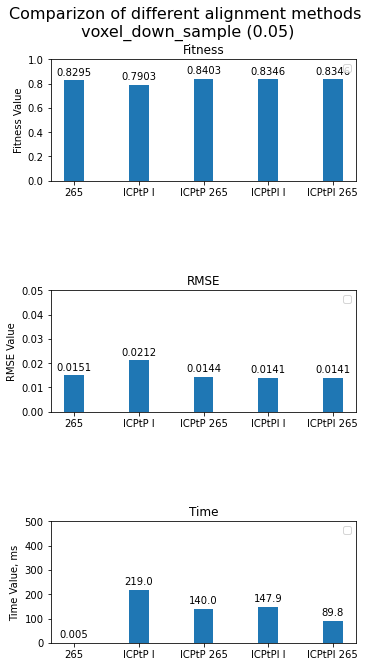

In [172]:
fitness_list =  [evaluation_init.fitness, TD.fitness, TD_init.fitness, TD_plane.fitness, TD_plane_init.fitness ]
rmse_list =  [evaluation_init.inlier_rmse, TD.inlier_rmse, TD_init.inlier_rmse, TD_plane.inlier_rmse, TD_plane_init.inlier_rmse]
time_list =  [0.005, 219, 140,147.9,89.8 ]
labels =  [ '265', 'ICPtP I', 'ICPtP 265',\
           'ICPtPl I','ICPtPl 265']
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, (ax0, ax, ax2) = plt.subplots(3,1)

fig.suptitle('Comparizon of different alignment methods\n voxel_down_sample (0.05)\n ', fontsize=16)
rects0 = ax0.bar(x, fitness_list, width)
rects1 = ax.bar(x, rmse_list, width)
rects2 = ax2.bar(x, time_list, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax0.set_ylabel('Fitness Value')
ax0.set_title('Fitness')
ax0.set_xticks(x)
ax0.set_xticklabels(labels)
ax0.legend()
ax0.set_ylim([0,1])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSE Value')
ax.set_title('RMSE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim([0,0.05])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Time Value, ms')
ax2.set_title('Time')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()
ax2.set_ylim([0,500])

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),4)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects0, ax0)
autolabel(rects1, ax)
autolabel(rects2, ax2)

fig.tight_layout()
fig.set_size_inches(5, 10)

plt.show()

In [180]:
def downsample_pointcloud(self, pointcloud_array):
        #downsampling cloud by 3x3 mask, and using center points as values to pass to downsampled cloud
        tmp = pointcloud_array
        result = tmp
        result_x = []
        result_y = []
        result_z = []
        j = 1
        for y in range(len(tmp['x'])):
            if y + j >= len(tmp['x']):
                break
            i = 1
            tmplistaX = []
            tmplistaY = []
            tmplistaZ = []
            for x in range(len(tmp['x'][0])):
                if x + i >= len(tmp['x'][0]):
                    break
                px = tmp['x'][y + j][x + i]
                py = tmp['y'][y + j][x + i]
                pz = tmp['z'][y + j][x + i]
                tmplistaX.append(px)
                tmplistaY.append(py)
                tmplistaZ.append(pz)
                i += 2
            j += 2
            result_x.append(tmplistaX)
            result_y.append(tmplistaY)
            result_z.append(tmplistaZ)
        result = np.resize(result, (len(result_x), len(result_x[0])))
        result['x'] = result_x
        result['y'] = result_y
        result['z'] = result_z
        return result

## Spatial filter analysis

In [335]:
pclw1 = convert_to_pcl(get_coordinates(depth_frame1, koef = 2**3))
pclw2 = convert_to_pcl(get_coordinates(depth_frame2, koef = 2**3))

In [430]:
%%time
spatial_filter = rs.spatial_filter(0.25,3,5,0)
depthImage1 = spatial_filter.process(depth_frame1)
depthImage2 = spatial_filter.process(depth_frame2)
0

Wall time: 161 ms


0

In [431]:
%%time
pclw1 = get_geom_pcl(depthImage1 )
pclw2 = get_geom_pcl(depthImage2)
#pclw1 = pclw1.voxel_down_sample(voxel_size=0.02)
#pclw2 = pclw2.voxel_down_sample(voxel_size=0.02)

Wall time: 1.28 s


In [432]:
evaluation_init = o3d.registration.evaluate_registration(pclw2, pclw1,
                                                    max_point_pair_dist, init)
evaluation_init

registration::RegistrationResult with fitness=8.496453e-01, inlier_rmse=1.147779e-02, and correspondence_set size of 311604
Access transformation to get result.

In [433]:
draw_registration_result(pclw2, pclw1, init)

In [434]:
%%time
Tw = o3d.registration.registration_icp(pclw2, pclw1, max_point_pair_dist)
Tw, Tw.transformation

Wall time: 17.1 s


(registration::RegistrationResult with fitness=8.372934e-01, inlier_rmse=1.742307e-02, and correspondence_set size of 307074
 Access transformation to get result.,
 array([[ 0.9747, -0.133 ,  0.1794, -0.1579],
        [ 0.1279,  0.991 ,  0.0397,  0.0031],
        [-0.1831, -0.0157,  0.983 ,  0.0212],
        [ 0.    ,  0.    ,  0.    ,  1.    ]]))

In [444]:
draw_registration_result(pclw2, pclw1, Tw.transformation)

In [436]:
%%time
Tw_init = o3d.registration.registration_icp(pclw2, pclw1, max_point_pair_dist, init)
Tw_init, Tw_init.transformation

Wall time: 6.83 s


(registration::RegistrationResult with fitness=8.605465e-01, inlier_rmse=1.088766e-02, and correspondence_set size of 315602
 Access transformation to get result.,
 array([[ 0.9634, -0.1797,  0.1991, -0.1788],
        [ 0.1647,  0.9823,  0.0894, -0.0178],
        [-0.2117, -0.0533,  0.9759,  0.0115],
        [ 0.    ,  0.    ,  0.    ,  1.    ]]))

In [437]:
pclw3 = copy.deepcopy(pclw1)
pclw4 = copy.deepcopy(pclw2)

In [438]:
%%time

pclw3.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
pclw4.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

Tw_plane = o3d.registration.registration_icp(pclw4,pclw3, max_point_pair_dist, np.eye(4),\
                                          o3d.registration.TransformationEstimationPointToPlane())
Tw_plane, Tw_plane.transformation

Wall time: 8.89 s


(registration::RegistrationResult with fitness=8.547414e-01, inlier_rmse=1.046413e-02, and correspondence_set size of 313473
 Access transformation to get result.,
 array([[ 0.963 , -0.18  ,  0.2009, -0.1765],
        [ 0.163 ,  0.9817,  0.0983, -0.0231],
        [-0.2149, -0.0619,  0.9747,  0.0098],
        [ 0.    ,  0.    ,  0.    ,  1.    ]]))

In [439]:
%%time
pclw3.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
pclw4.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
Tw_plane_init = o3d.registration.registration_icp(pclw4,pclw3, max_point_pair_dist, init,\
                                          o3d.registration.TransformationEstimationPointToPlane())
Tw_plane_init,Tw_plane_init.transformation

Wall time: 3.12 s


(registration::RegistrationResult with fitness=8.547278e-01, inlier_rmse=1.046319e-02, and correspondence_set size of 313468
 Access transformation to get result.,
 array([[ 0.963 , -0.18  ,  0.2009, -0.1764],
        [ 0.163 ,  0.9817,  0.0983, -0.0231],
        [-0.2149, -0.0619,  0.9747,  0.0098],
        [ 0.    ,  0.    ,  0.    ,  1.    ]]))

In [443]:
draw_registration_result(pclw4,pclw3, Tw_plane_init.transformation)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


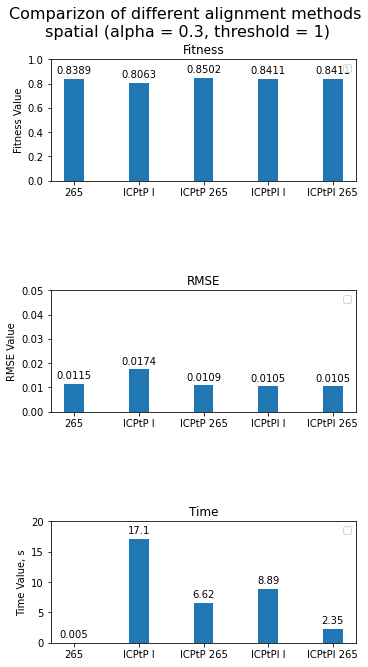

In [445]:
itness_list =  [evaluation_init.fitness, Tw.fitness, Tw_init.fitness, Tw_plane.fitness, Tw_plane_init.fitness ]
rmse_list =  [evaluation_init.inlier_rmse, Tw.inlier_rmse, Tw_init.inlier_rmse, Tw_plane.inlier_rmse, Tw_plane_init.inlier_rmse]
time_list =  [0.005, 17.1, 6.62,8.89,2.35 ]
labels =  [ '265', 'ICPtP I', 'ICPtP 265',\
           'ICPtPl I','ICPtPl 265']
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, (ax0, ax, ax2) = plt.subplots(3,1)

fig.suptitle('Comparizon of different alignment methods\n spatial (alpha = 0.3, threshold = 1)\n ', fontsize=16)
rects0 = ax0.bar(x, fitness_list, width)
rects1 = ax.bar(x, rmse_list, width)
rects2 = ax2.bar(x, time_list, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax0.set_ylabel('Fitness Value')
ax0.set_title('Fitness')
ax0.set_xticks(x)
ax0.set_xticklabels(labels)
ax0.legend()
ax0.set_ylim([0,1])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSE Value')
ax.set_title('RMSE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim([0,0.05])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Time Value, s')
ax2.set_title('Time')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()
ax2.set_ylim([0,20])

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),4)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects0, ax0)
autolabel(rects1, ax)
autolabel(rects2, ax2)

fig.tight_layout()
fig.set_size_inches(5, 10)

plt.show()

In [ ]:
def downsampleRandom(pcl, pc2, float rate):
    num_points_out = 0
    num_points = cloud->points.size();

In [ ]:
void CloudDownsampler::downsampleRandom(pcl::PointCloud<pcl::PointXYZRGBA>::Ptr cloud, pcl::PointCloud<pcl::PointXYZRGBA>::Ptr cloud_out, float rate)
{
  srand (time(NULL));
  unsigned int num_points_out = 0;
  unsigned int num_points = cloud->points.size();
  uint8_t* mask = new uint8_t[num_points]; 
  double prob = 1.0;
  for(unsigned int i = 0; i < num_points; i++)
  {
    int randnum = rand() % 10000;
    bool keep = randnum > (int)((1.0-prob*rate) * 10000);
    
    if(keep)
    {
      mask[i] = 1;
      num_points_out++;     
    }
    else
    {
      mask[i] = 0;
    }
  }

  std::cout<<"num_points_out = "<<num_points_out<<std::endl;

  cloud_out->resize(num_points_out);

  unsigned int p_cnt = 0;
  for(unsigned long int i = 0; i < num_points; i++)
  {
    if(mask[i])
    {
      cloud_out->points[p_cnt] = cloud->points[i];
      p_cnt++;
    }
  }
}


In [334]:
def get_coordinates(depth_frame, make_sampling=True, koef = 2**2):
    """
     TODO
    :param make_sampling:
    :return:
    """
    pc = rs.pointcloud()
    if make_sampling:
        decimate = rs.decimation_filter()
        decimate.set_option(rs.option.filter_magnitude, koef)
        depth_frame = decimate.process(depth_frame)
        spatial_filter = rs.spatial_filter(0.7,2,5,0)
        depth_frame = spatial_filter.process(depth_frame)
        points = pc.calculate(depth_frame).as_points()
    else:
        points = pc.calculate(depth_frame).as_points()

    coordinates = np.ndarray(buffer=points.get_vertices(), dtype=np.float32, shape=(points.size(), 3))
    coordinates = coordinates[coordinates[:, 2] != 0]

    #coordinates = apply_transformation(T_d_wrt_t, coordinates)
    return coordinates


error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\bilateral_filter.dispatch.cpp:424: error: (-210:Unsupported format or combination of formats) Bilateral filtering is only implemented for 8u and 32f images in function 'cv::bilateralFilter'


In [120]:
import pyrealsense2 as rs
import cv2
import numpy as np
import time
from IPython.display import clear_output
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt

In [156]:
def plot_pose(frames=[], poses=[], show_t=True, show_coord=True, show_pose=True, t_names=['$\mathbf{t}$']):
    """Plotting poses in frames

    Args:
        frames (list): frames to plot in addition to original frame.
        poses (list): poses to plot in the original frame.
        
        show_t (bool): depict t-vector name
        show_coord (bool): depict pose coordinates

    Returns:
        None.
    """
    def get_xyzuvctt(T):
        t = T[:3, 3:4].flatten(); t_ = t/(np.linalg.norm(t)+1e-5)*5
        R = T[:3,:3]
        (x, y, z), (u, v, c) = np.repeat(t.reshape(3,1),3, axis=1), R
        return x, y, z, u, v, c, t, t_
 
    
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111, projection='3d')
    lngth = 3

    # fig appearance
    ax.view_init(elev=22, azim=32)
#     ax.set_aspect('equal')
    ax.view_init(elev=22, azim=20)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.axis('off'); #ax.axis('equal')
    
    
    #origin and coordinate axes (coordinate frame)
    xl = 'x'; yl = 'y'; zl = 'z'; ol = 'O'
    x, y, z, u, v, c, t, t_ = get_xyzuvctt(np.eye(4))
        
    ax.scatter(t_[0], t_[1], t_[2], s=80, c='k')
    ax.quiver(x, y, z, u, v, c, color='k', length=lngth, arrow_length_ratio=0.2, linewidth=0.5)
    ax.text(0,-0.5,-0.1,ol); 
    ax.text(lngth*1.2,0,0,xl); ax.text(0,lngth*1.2,0,yl); ax.text(0,0,lngth*1.2,zl)
    # aid to have initial minimum dimensions of plot
    ax.scatter(4,4,4, alpha=0)
    
    for frame in frames:
        x, y, z, u, v, c, t, t_ = get_xyzuvctt(frame)
        ax.scatter(t_[0], t_[1], t_[2], s=80, c='k')
        ax.quiver(
            x, y, z, u, v, c, color='k', length=lngth, arrow_length_ratio=0.2, linewidth=0.5)
        xl += '\''; yl += '\''; zl += '\''; ol += '\''
        ax.text(t_[0],t_[1]-0.5,t_[2]-0.1,ol); 
        frame = frame @ np.diag([lngth*1.2, lngth*1.2, lngth*1.2, 1])
        ax.text(frame[:3,:3][0][0]+t_[0],frame[:3,:3][1][0]+t_[1], frame[:3,:3][2][0]+t_[2],xl);
        ax.text(frame[:3,:3][0][1]+t_[0],frame[:3,:3][1][1]+t_[1], frame[:3,:3][2][1]+t_[2],yl);
        ax.text(frame[:3,:3][0][2]+t_[0],frame[:3,:3][1][2]+t_[1], frame[:3,:3][2][2]+t_[2],zl);
    
    prev_t = [0, 0, 0]
    for i, pose in enumerate(poses):
        # given frame
        x, y, z, u, v, c, t, t_ = get_xyzuvctt(pose)
        ax.plot([prev_t[0], t[0]], [prev_t[1], t[1]], [prev_t[2], t[2]], color='k', linewidth=2)
        prev_t = t
  
    if show_pose:
            ax.quiver(x, y, z, u, v, c, arrow_length_ratio=0, color=['r','g','b'], linestyle='-', linewidth=4)
    if show_coord:
            ax.text(t[0], t[1], t[2]-0.7, '('+str(t[0])+','+str(t[1])+','+str(t[2])+')')
    
    plt.show()

NotImplementedError: It is not currently possible to manually set the aspect on 3D axes

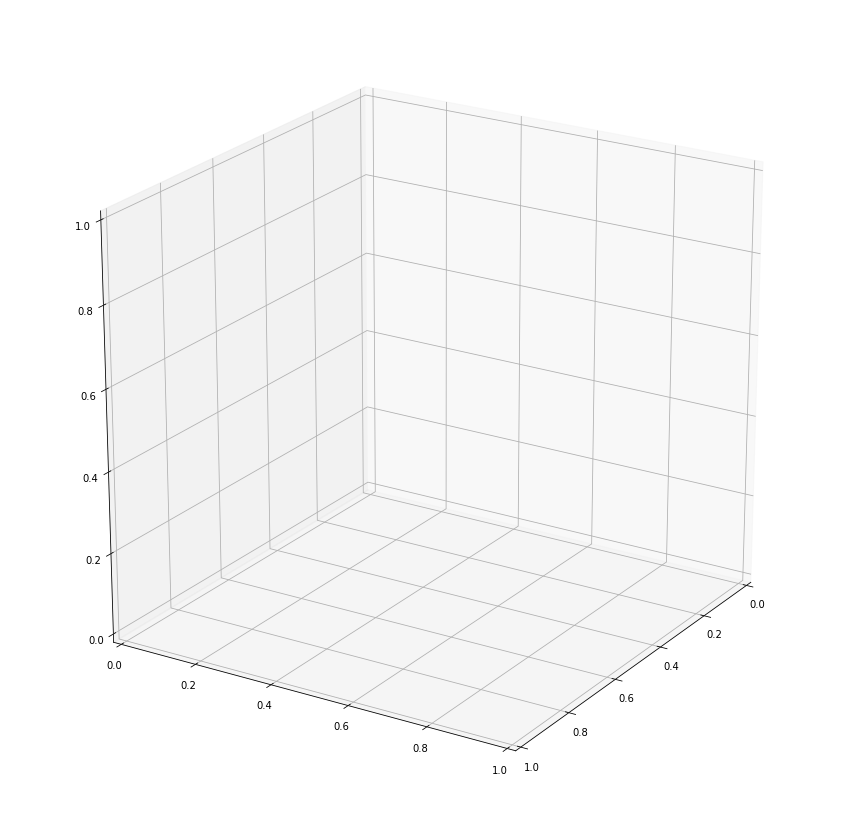

In [157]:
tm = np.eye(4)
transformation_matrix_set = []
transformation_matrix_set.append(tm)

for _ in range(20):
    tm[0,-1]+=0.2 #X
    tm[1,-1]+=0.5 #Y
#     tm[2,-1]+=0.5 #Z
    transformation_matrix_set.append(tm)
    plot_pose(poses=transformation_matrix_set)
    time.sleep(0.01)
    clear_output(wait=True)
plt.show()

In [ ]:
# rewind
for i in range(frames_between_frames_D435*count_of_frames*2):
    pipe_d435.wait_for_frames()

In [ ]:
d435_frames = []
while len(d435_frames) != count_of_frames:
    for i in range(frames_between_frames_D435):
        depth_frame = pipe_d435.wait_for_frames().get_depth_frame()
    d435_frames.append(depth_frame)

In [ ]:
pose_frame = None
pose_frame_time = -1
thresh = 7
t265_frames = []
t265_frames_temp = []
n = 0

for i, depth_frame in enumerate(d435_frames):
    depth_frame_time = depth_frame.get_timestamp()
    while abs(depth_frame_time-pose_frame_time) > thresh:
        pose_frame = pipe_t265.wait_for_frames().get_pose_frame()
        pose_frame_time = pose_frame.get_timestamp()
    while abs(depth_frame_time-pose_frame_time) <= thresh:
        pose_frame = pipe_t265.wait_for_frames().get_pose_frame()
        t265_frames_temp.append(pose_frame)
        pose_frame_time = pose_frame.get_timestamp()

    min_int_index = 0
    min_interval = thresh * 2
    for ind_pose, temp_pose in enumerate(t265_frames_temp):
        if abs(depth_frame_time-temp_pose.get_timestamp())<min_interval:
            min_interval = abs(depth_frame_time-temp_pose.get_timestamp())
            min_int_index = ind_pose
    t265_frames.append(t265_frames_temp[min_int_index])
    

## Test for frames

In [ ]:
def count_diff_frames(frames):
    prev_frame = None
    for i, frame in enumerate(frames):
        if prev_frame is not None:
            print("Difference bw {0} and {1} frames is {2:.4f} ms".format(i, i-1, frame.get_timestamp()-prev_frame.get_timestamp()))
        prev_frame = frame

In [ ]:
def get_diff_sensors(frames1, frames2):
    if len(frames1) != len(frames2):
        return
    else:
        for i in range(len(frames1)):
            print("Difference bw frames1[{0}] and frames2[{0}] frames is {1:.4f} ms".format(i, frames1[i].get_timestamp()-frames2[i].get_timestamp()))
        

In [ ]:
count_diff_frames(d435_frames)
count_diff_frames(t265_frames)

In [ ]:
get_diff_sensors(d435_frames, t265_frames)

# Analysis

## Helpers

In [ ]:
import time
from functools import wraps

def timing(f):
    @wraps(f)
    def wrap(*args, **kw):
        time_start = time.time()
        result = f(*args, **kw)
        time_end = time.time()
        print('----------func:%r took: %2.4f sec' % (f.__name__, time_end-time_start))
        return result
    return wrap

In [ ]:
tm_T265toD435 = np.array([[0.999968402, -0.006753626, -0.004188075, -0.015890727],
                          [-0.006685408, -0.999848172, 0.016093893, 0.028273059],
                          [-0.004296131, -0.016065384, -0.999861654, -0.009375589],
                          [0, 0, 0, 1]])

In [ ]:
# Graph plot
t265 = np.load('../logs/points_trajectory_T265.npy') #np array coords
d435 = np.load('../logs/points_trajectory_D435.npy')/1 # np array coords
# before = 10
before = d435.shape[0]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.plot(t265[:before, 0], t265[:before, 1], t265[:before, 2], label='t265')
ax.plot(d435[:before, 0], d435[:before, 1], d435[:before, 2], label='d435')
ax.view_init(elev=22, azim=80)
plt.legend()

## Functions

In [46]:
def get_transformation(pose):
    data = pose.get_pose_data()
    data_rot = [float(i.strip('xyzw: ')) for i in str(data.rotation).split(', ')]
    r = R.from_quat(data_rot)
    rotation = np.array(r.as_matrix())
    translation = np.array([float(i.strip('xyzw: ')) for i in str(data.translation).split(', ')])[np.newaxis].T
    T = np.hstack((rotation, translation))
    T = np.vstack((T, np.array([0, 0, 0, 1])))
    return T

In [47]:
get_transformation(t265_frames[0])

NameError: name 't265_frames' is not defined

In [106]:
def apply_transformation(transformation, points):
    """

    :param transformation: 4x4 np.array
    :param points: Nx3 np.array
    :return: transformed Nx3 np.array
    """
    if transformation is None or points is None:
        return None
    else:
        coordinates = np.hstack((points, np.ones((points.shape[0], 1))))
        return (np.linalg.inv(transformation) @ coordinates.T).T[:, :-1]

In [50]:
get_coordinates(d435_frames[0]).shape

NameError: name 'd435_frames' is not defined

In [51]:
def convert_to_pcl(points):
    """
        TODO
    :param points: Nx3
    :return:
    """
    if points is None:
        return None
    else:
        return o3d.geometry.PointCloud(o3d.utility.Vector3dVector(points))

In [ ]:
convert_to_pcl(get_coordinates(d435_frames[0]))

In [52]:
# TODO this 100%

def get_transformation(self, max_point_pair_dist=0.2, init_guess=np.eye(4)):
    old_point_cloud = self.apply_transformation(self.prev_tm, self.point_cloud)
    old_pcl = self.convert_to_pcl(old_point_cloud) # n-1
    self.point_cloud = self.apply_transformation(self.prev_tm, self.get_coordinates())
    if old_pcl is None:
        self.prev_tm = init_guess
        print("\n\n\n{}\n\n\n".format(init_guess))
        return None

    new_pcl = self.convert_to_pcl(self.point_cloud) # n

    tr_mx = o3d.registration.registration_icp(old_pcl, new_pcl, max_point_pair_dist,
                                              self.prev_tm, o3d.registration.TransformationEstimationPointToPoint())\
        .transformation
    self.prev_tm = tr_mx
    return tr_mx